## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import pickle
import csv
import missingno as msno
from IPython.display import display, HTML
from tqdm import tqdm

In [2]:
# check the system font
import matplotlib.font_manager as font_manager
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# add the font wanted
font_dir = ['../Latin-Modern-Roman']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'Latin Modern Roman'
print(plt.rcParams['font.family'])

['Latin Modern Roman']


## Analyse sepsis and non-sepsis

In [3]:
neonates_sepsis = './data/balanced_2000/sepsis/' 
sepsis_dir = os.listdir(neonates_sepsis)
neonates_non_sepsis = './data/balanced_2000/non_sepsis/'
non_sepsis_dir = os.listdir(neonates_non_sepsis)

### Sepsis

In [4]:
sepsis_num = 0
info_overview = pd.DataFrame(columns=['subject_id','gender', 'los/hrs','positiveAt'])
for csv_file in sepsis_dir:
  sepsis_num += 1

  info = pd.read_csv(neonates_sepsis+csv_file)

  subject_id = info.subject_id[0]
  gender = info.gender[0]
  los = len(info)
  positive_at = info.index[info['sepsis']][0]

  new_row = {
      'subject_id':subject_id,
      'gender': gender,
      'los/hrs':los,
      'positiveAt': positive_at
  }
  info_overview = info_overview.append(new_row, ignore_index = True)

In [5]:
print('There are {} neonates with sepsis'.format(sepsis_num))
info_overview

There are 1000 neonates with sepsis


,subject_id,gender,los/hrs,positiveAt
0,1953,1,97,90
1,1947,1,94,87
2,1012,1,68,61
3,1774,1,78,71
4,1760,1,67,60
...,...,...,...,...
995,1779,1,47,40
996,1786,1,87,80
997,1792,1,83,76
998,1962,1,98,91


In [7]:
!mkdir -p ./figs

1    570
0    430
Name: gender, dtype: int64


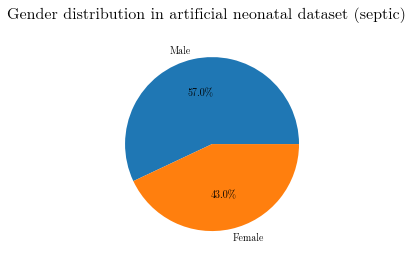

In [11]:
gender_dis = info_overview.gender.value_counts()
print(gender_dis)

#plot
fig, ax = plt.subplots()
fig.suptitle('Gender distribution in artificial neonatal dataset (septic)', size=16)
ax.pie(gender_dis, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.savefig('./figs/gender_distribution_septic.pdf')

### Non-sepsis

In [12]:
non_sepsis_num = 0
info_overview_non = pd.DataFrame(columns=['subject_id','gender','los/hrs'])
for csv_file in non_sepsis_dir:
  non_sepsis_num += 1

  info = pd.read_csv(neonates_non_sepsis+csv_file)

  subject_id = info.subject_id[0]
  gender = info.gender[0]
  los = len(info)

  new_row = {
      'subject_id':subject_id,
      'gender': gender,
      'los/hrs':los
  }
  info_overview_non = info_overview_non.append(new_row, ignore_index = True)


In [13]:
print('There are {} neonates with no sepsis'.format(non_sepsis_num))
info_overview_non

There are 1000 neonates with no sepsis


,subject_id,gender,los/hrs
0,2282,1,100
1,2296,1,100
2,2269,1,100
3,2527,1,100
4,2241,1,100
...,...,...,...
995,2258,0,100
996,2516,1,100
997,2270,1,100
998,2264,1,100


1    558
0    442
Name: gender, dtype: int64


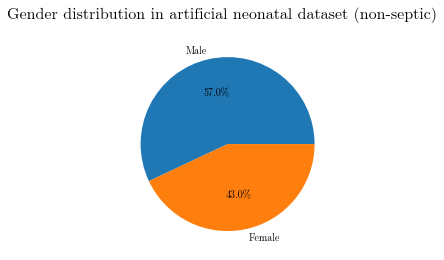

In [14]:
gender_dis_non = info_overview_non.gender.value_counts()
print(gender_dis_non)

#plot
fig, ax = plt.subplots()
fig.suptitle('Gender distribution in artificial neonatal dataset (non-septic)', size=16)
ax.pie(gender_dis, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.savefig('./figs/gender_distribution_non_septic.pdf')

### Combined

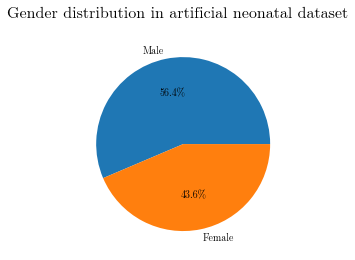

In [17]:
gender_dis_combined = gender_dis + gender_dis_non

#plot
fig, ax = plt.subplots()
fig.suptitle('Gender distribution in artificial neonatal dataset', size=16)
ax.pie(gender_dis_combined, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.savefig('./figs/gender_distribution_combined.pdf')

## Analyse distribution

In [18]:
with open('./data/balanced_2000/data_all.pickle', 'rb') as f:
    data_all = pickle.load(f)
with open('./data/balanced_2000/sepsis.pickle', 'rb') as f:
    data_sepsis = pickle.load(f)
with open('./data/balanced_2000/non_sepsis.pickle', 'rb') as f:
    data_non_sepsis = pickle.load(f)

In [20]:
# lab test features 
labs=['BaseExcess', 'FiO2', 'PCO2', 'PH', 'Calcium', 'Sodium',
       'Potassium', 'Creatinine', 'Chloride', 'Glucose', 'WBC', 'BUN', 'PTT',
       'Platelet']

# vital signal features
vitals = ['HR','SaO2','Temp','SBP','MAP','DBP','RR']

# demographic features
demogs = ['gender']

# label
labels = ['sepsis']

# numerical value features
num_features = [ 'HR','SaO2','Temp','SBP','MAP','DBP','RR', 'BaseExcess', 'FiO2', 
                'PCO2', 'PH', 'Calcium', 'Sodium','Potassium', 'Creatinine', 
                'Chloride', 'Glucose', 'WBC', 'BUN', 'PTT', 'Platelet']

In [21]:
def feature_distribution(data_frame,feature_name):
  df = data_frame
  feature = df[feature_name]
  feature_min = feature.min()
  feature_max = feature.max()
  feature_mean = feature.mean()
  feature_std = feature.std()
  missing_rate = feature.isnull().sum() / len(feature)
  return feature_min, feature_max, feature_mean, feature_std, missing_rate

### Sepsis

In [22]:
df_feature_sepsis = pd.DataFrame(columns=['Feature','Min','Max','Mean','STD','MissingRate'])
for feature in num_features:
  feature_min, feature_max, feature_mean, feature_std, missing_rate = feature_distribution(data_sepsis,feature)
  df_feature_sepsis = df_feature_sepsis.append({'Feature':feature,'Min':feature_min,'Max':feature_max,'Mean':feature_mean,'STD':feature_std,'MissingRate':missing_rate}, ignore_index = True)

df_feature_sepsis

,Feature,Min,Max,Mean,STD,MissingRate
0,HR,50.008396,299.997533,149.826278,36.586262,0.019710
1,SaO2,36.000023,99.999352,67.838176,18.471536,0.020492
2,Temp,32.001969,39.999981,36.664268,0.984953,0.739094
3,SBP,30.000080,97.998260,64.078477,19.549816,0.890064
4,MAP,7.032497,77.997094,42.544035,20.528106,0.890180
5,DBP,4.032710,66.999332,35.589398,18.198397,0.890000
6,RR,0.000982,59.999856,35.540918,16.399722,0.090111
7,BaseExcess,-17.992976,6.987919,-5.335693,7.185905,0.979867
8,FiO2,21.001287,99.997934,60.489789,22.889776,0.399426
9,PCO2,25.046474,97.991024,61.114428,21.290209,0.969967


In [24]:
labs_df = data_sepsis[labs]
vitals_df = data_sepsis[vitals]
demogs_df = data_sepsis[demogs]
print('Missing Rate of Lab Features:',np.mean((labs_df.isnull().sum() / labs_df.shape[0])) )
print('Missing Rate of Vital Sign Features:',np.mean((vitals_df.isnull().sum() / vitals_df.shape[0])) )
print('Missing Rate of Demographics Features:',np.mean((demogs_df.isnull().sum() / demogs_df.shape[0])) )

Missing Rate of Lab Features: 0.939929360988067
Missing Rate of Vital Sign Features: 0.5056643108116525
Missing Rate of Demographics Features: 0.0


Dense Display

*The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.*

In [ ]:
msno.matrix(labs_df)

In [ ]:
msno.matrix(vitals_df)

In [ ]:
msno.matrix(demogs_df)

In [ ]:
#pick out the columns that contain null data
missingdata_df = data_sepsis.columns[data_sepsis.isnull().any()].tolist()
print('Number of featurs that contains null values',len(missingdata_df))
msno.bar(data_sepsis[missingdata_df], color="blue", log=False, figsize=(30,18))

In [ ]:
msno.heatmap(data_sepsis[missingdata_df], figsize=(20,20))

### Non-Sepsis

In [25]:
labs_df = data_non_sepsis[labs]
vitals_df = data_non_sepsis[vitals]
demogs_df = data_non_sepsis[demogs]
print('Missing Rate of Lab Features:',np.mean((labs_df.isnull().sum() / labs_df.shape[0])) )
print('Missing Rate of Vital Sign Features:',np.mean((vitals_df.isnull().sum() / vitals_df.shape[0])) )
print('Missing Rate of Demographics Features:',np.mean((demogs_df.isnull().sum() / demogs_df.shape[0])) )

Missing Rate of Lab Features: 0.9607142857142857
Missing Rate of Vital Sign Features: 0.5342857142857143
Missing Rate of Demographics Features: 0.0


In [26]:
df_feature_non_sepsis = pd.DataFrame(columns=['Feature','Min','Max','Mean','STD','MissingRate'])
for feature in num_features:
  feature_min, feature_max, feature_mean, feature_std, missing_rate = feature_distribution(data_non_sepsis,feature)
  df_feature_non_sepsis = df_feature_non_sepsis.append({'Feature':feature,'Min':feature_min,'Max':feature_max,'Mean':feature_mean,'STD':feature_std,'MissingRate':missing_rate}, ignore_index = True)

df_feature_non_sepsis

,Feature,Min,Max,Mean,STD,MissingRate
0,HR,50.105177,299.993180,142.830888,23.609265,0.11
1,SaO2,0.005335,99.998791,50.171376,28.890511,0.13
2,Temp,89.601422,103.993573,97.944842,1.290863,0.74
3,SBP,5.017974,168.960237,87.976137,47.679363,0.88
4,MAP,0.013416,100.986979,50.240141,29.119956,0.88
5,DBP,0.390023,239.999028,120.550871,69.180541,0.88
6,RR,0.002572,59.999942,31.402245,17.323851,0.12
7,BaseExcess,-37.986321,13.988731,-12.295340,15.300664,0.98
8,FiO2,21.000671,99.997075,60.454395,22.715955,0.68
9,PCO2,4.029434,142.825532,71.713036,38.629922,0.98


In [ ]:
df_feature_non_sepsis.to_pickle("/content/drive/MyDrive/Colab_Notebooks/MIMIC/Results/neonates/non_sepsis_feature_dis.pickle")

In [ ]:
msno.matrix(labs_df)

In [ ]:
msno.matrix(vitals_df)

In [ ]:
msno.matrix(demogs_df)

In [ ]:
#pick out the columns that contain null data
missingdata_df = data_non_sepsis.columns[data_non_sepsis.isnull().any()].tolist()
print('Number of featurs that contains null values',len(missingdata_df))
msno.bar(data_non_sepsis[missingdata_df], color="blue", log=False, figsize=(30,18))

In [ ]:
msno.heatmap(data_non_sepsis[missingdata_df], figsize=(20,20))

### Combined

In [27]:
data_all.columns

Index(['sepsis', 'subject_id', 'gender', 'SBP', 'DBP', 'MAP', 'Temp', 'HR',
       'RR', 'BaseExcess', 'FiO2', 'SaO2', 'PCO2', 'PH', 'Calcium', 'Sodium',
       'Potassium', 'Creatinine', 'Chloride', 'Glucose', 'WBC', 'BUN', 'PTT',
       'Platelet'],
      dtype='object')

Number of featurs that contains null values 21


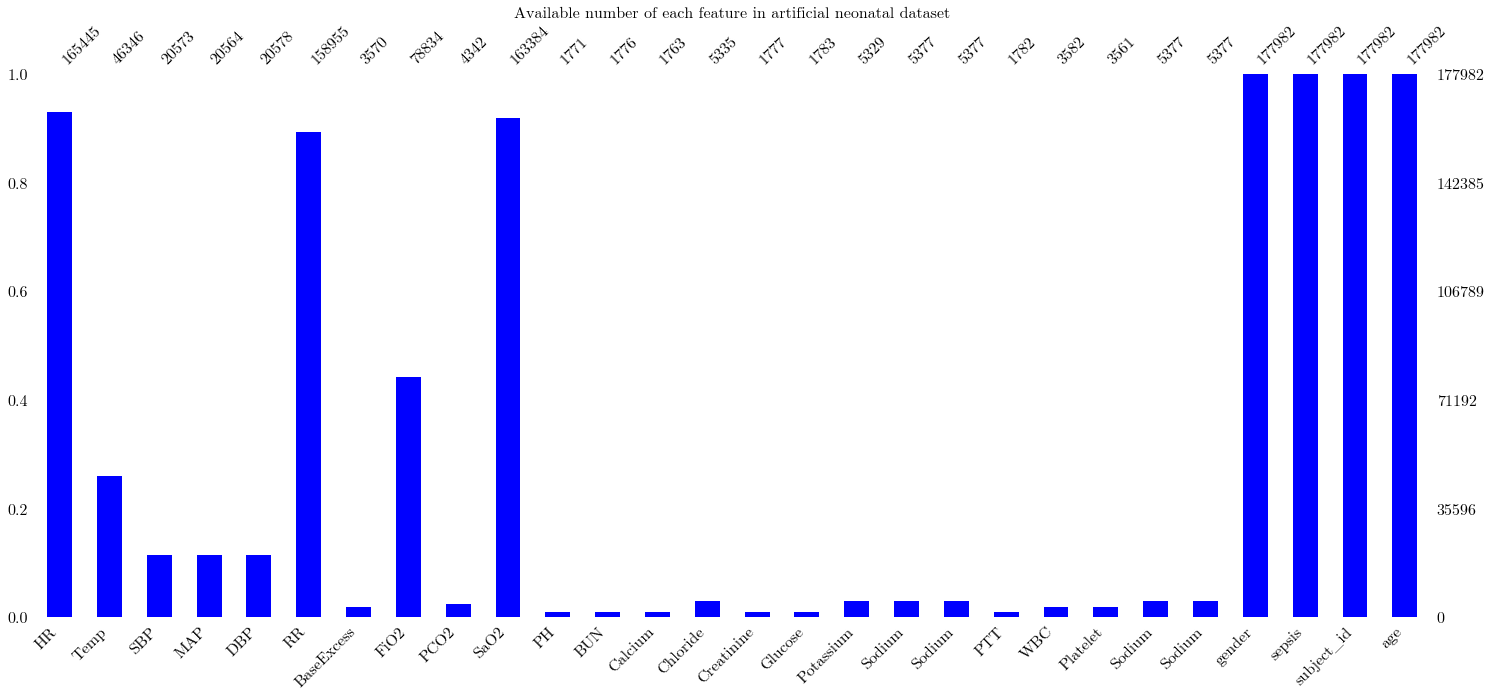

In [30]:
#pick out the columns that contain null data
missingdata_df = data_sepsis.columns[data_sepsis.isnull().any()].tolist()
print('Number of featurs that contains null values',len(missingdata_df))

#re-arrange the order of columns
#       
data_all = data_all[['HR', 'Temp', 'SBP', 'MAP', 'DBP', 'RR', 
                            'BaseExcess', 'FiO2', 'PCO2', 'SaO2', 'PH', 'BUN', 
                            'Calcium', 'Chloride', 'Creatinine', 'Glucose', 
                            'Potassium', 'Sodium', 'PTT',
                            'WBC', 'Platelet', 'Sodium', 
                            'gender','sepsis', 'subject_id']]
data_all['age'] = 0

plt.figure(figsize=(20,10))
msno.bar(data_all, color="blue", log=False)
plt.title('Available number of each feature in artificial neonatal dataset', size=16)
plt.show()